In [1]:
# Importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Importing the dataset 
dataset = pd.read_csv("Ads_CTR_Optimisation.csv") 

In [10]:
dataset.shape

(10000, 10)

In [11]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:

# Upper Confidence Bound Algorithm
import math
N = 10000 #number of observation
d = 10 #Number of Ads or Machines
numbers_of_selection = [0] * d  #numbers_of_selections_of_each_machine 
sums_of_rewards = [0] * d #sums_of_rewards_for_each_machine


### Define two more variables prior to the algorithm, one to store the sequence of the machines that are selected at each round and another variable to store the total rewards produced by the algorithm.


In [5]:
ads_selected = [] #machines_selected
total_reward = 0  #the total rewards produced by the algorithm.

In [6]:
def ucb_method(N):
    global total_reward
    for n in range(0, N):
        ad = 0
        max_upper_bound = 0
        for i in range(0, d):
            if(numbers_of_selection[i] > 0):
                average_reward = sums_of_rewards[i] / numbers_of_selection[i]
                delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selection[i])
                upper_bound = average_reward + delta_i
                
                
                #print(i, upper_bound)
            else:
                # if the machine is being selected for the first time 
                #then it sets a default upper bound value of 1e400.
                upper_bound = 1e400
                
                
            
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad = i
                
        ads_selected.append(ad)
        numbers_of_selection[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_rewards[ad] += reward
        total_reward += reward 

In [7]:
ucb_method(N)

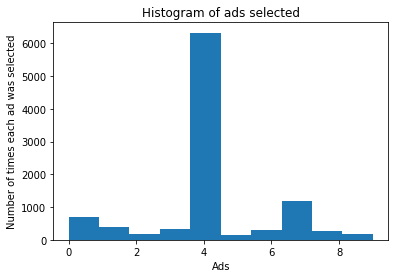

In [8]:

# Visualizing the results
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()